In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn import feature_selection

In [3]:
df = pd.read_csv('final project 2.csv')
df.columns = ['SID', 'Site','CID','Campaign','Size','Device','Impressions','Rate','Time','Touch']
df.head()

,SID,Site,CID,Campaign,Size,Device,Impressions,Rate,Time,Touch
0,172365904,sbn,222458344,SB Nations - Net Communities Luma tag,300x250,iPhone,51291646,0.33,10.62,0.19
1,172365904,sbn,222458344,SB Nations - Net Communities Luma tag,300x250,Android Phone,41187658,0.32,11.58,0.09
2,172365904,sbn,432771664,50001622_Product Q2-Q3,300x265,iPhone,21026492,0.66,10.89,0.48
3,172365784,verge,220395784,TheVerge - Net Communities Luma tag,300x250,Android Phone,20392741,0.27,11.35,0.08
4,172365904,sbn,438358864,50002179_Ticket Partnership Year 1,300x265,iPhone,20219612,0.69,11.23,0.55


Since there are more variables than needed, I extracted only the ones I'll be using and plotted them against their frequency to get an idea of the distrubution.

/Users/karentran/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


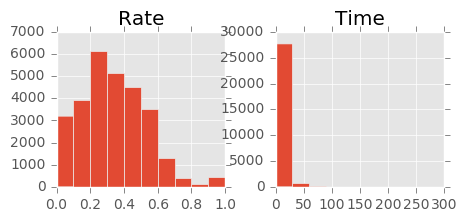

In [4]:
columns_to_keep = ["Site", "Size", "Device", "Rate","Time"] 
df_column = df[columns_to_keep]
fig, ax = plt.subplots(figsize=(5,2))
df_column.hist(ax=ax);

In [5]:
df_column.describe()

,Rate,Time
count,28687.000000,28687.000000
mean,0.334479,10.787838
std,0.199889,11.288944
min,0.000000,0.000000
25%,0.200000,5.100000
50%,0.320000,8.860000
75%,0.460000,13.330000
max,1.000000,300.000000


In [6]:
# convert sites into dummies
size = pd.get_dummies(df_column.Size, prefix='size')
size.head()

,size_1030x590,size_300x250,size_300x265,size_320x50
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0


In [7]:
site = pd.get_dummies(df_column.Site, prefix='site')
site.head()

,site_MKBHD,site_curbed,site_eater,site_network,site_polygon,site_racked,site_recode,site_sbn,site_verge,site_vox,site_voxcreative
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [8]:
device = pd.get_dummies(df_column.Device, prefix='device')
device.head()

,device_Android Phone,device_Android Tablet,device_BlackBerry,device_Kindle,device_Windows Phone,device_Windows Tablet,device_iPad,device_iPhone,device_iPod
0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0


In [9]:
df_join = df_column.join(size).drop("Size", axis=1).join(site).drop("Site", axis=1).join(device).drop("Device", axis=1)
df_join.head()

,Rate,Time,size_1030x590,size_300x250,size_300x265,size_320x50,site_MKBHD,site_curbed,site_eater,site_network,...,site_voxcreative,device_Android Phone,device_Android Tablet,device_BlackBerry,device_Kindle,device_Windows Phone,device_Windows Tablet,device_iPad,device_iPhone,device_iPod
0,0.33,10.62,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.32,11.58,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.66,10.89,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.27,11.35,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.69,11.23,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
df_join.describe()

,Rate,Time,size_1030x590,size_300x250,size_300x265,size_320x50,site_MKBHD,site_curbed,site_eater,site_network,...,site_voxcreative,device_Android Phone,device_Android Tablet,device_BlackBerry,device_Kindle,device_Windows Phone,device_Windows Tablet,device_iPad,device_iPhone,device_iPod
count,28687.000000,28687.000000,28881.000000,28881.000000,28881.000000,28881.000000,28881.000000,28881.000000,28881.000000,28881.000000,...,28881.000000,28881.000000,28881.000000,28881.000000,28881.000000,28881.000000,28881.000000,28881.000000,28881.000000,28881.000000
mean,0.334479,10.787838,0.326685,0.417610,0.090752,0.164953,0.000173,0.075136,0.068869,0.029881,...,0.003809,0.195042,0.118902,0.063225,0.085350,0.089609,0.038884,0.132544,0.202659,0.073786
std,0.199889,11.288944,0.469009,0.493174,0.287261,0.371144,0.013157,0.263615,0.253235,0.170263,...,0.061598,0.396240,0.323678,0.243371,0.279407,0.285626,0.193321,0.339087,0.401988,0.261426
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,5.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.320000,8.860000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.460000,13.330000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df_join.corr() #try scaling first to see if correlation helps but just might not be linear. 

,Rate,Time,size_1030x590,size_300x250,size_300x265,size_320x50,site_MKBHD,site_curbed,site_eater,site_network,...,site_voxcreative,device_Android Phone,device_Android Tablet,device_BlackBerry,device_Kindle,device_Windows Phone,device_Windows Tablet,device_iPad,device_iPhone,device_iPod
Rate,1.000000,0.172889,-0.087044,0.076345,0.256394,-0.190055,0.001157,-0.012933,0.034732,0.076371,...,-0.035815,-0.039845,0.009486,-0.042225,0.032651,-0.054999,0.059325,0.045687,0.015162,-0.010715
Time,0.172889,1.000000,-0.207531,0.111681,0.031917,0.089596,-0.005747,-0.045195,-0.028798,-0.027448,...,-0.016306,-0.018663,0.112837,-0.066448,0.078768,0.020871,-0.004232,0.011779,-0.067512,-0.065057
size_1030x590,-0.087044,-0.207531,1.000000,-0.589840,-0.220060,-0.309585,-0.009166,-0.044504,-0.024133,0.251960,...,0.080380,-0.011034,0.008933,-0.004710,0.005211,-0.012009,0.019909,0.036022,-0.018933,-0.014732
size_300x250,0.076345,0.111681,-0.589840,1.000000,-0.267525,-0.376360,-0.000470,0.030838,0.026720,-0.148616,...,-0.047800,-0.006804,0.000201,-0.007661,-0.004375,-0.004369,0.003640,0.027412,-0.002493,-0.007769
size_300x265,0.256394,0.031917,-0.220060,-0.267525,1.000000,-0.140414,0.023328,0.027009,0.017847,-0.055446,...,-0.019535,-0.020140,0.003858,0.029860,0.012208,0.026644,-0.008052,-0.026802,-0.021940,0.030251
size_320x50,-0.190055,0.089596,-0.309585,-0.376360,-0.140414,1.000000,-0.005848,-0.005644,-0.018823,-0.078003,...,-0.022938,0.038572,-0.014541,-0.006978,-0.010220,0.000360,-0.023764,-0.061201,0.044220,0.005526
site_MKBHD,0.001157,-0.005747,-0.009166,-0.000470,0.023328,-0.005848,1.000000,-0.003751,-0.003579,-0.002309,...,-0.000814,0.013449,-0.004834,-0.003419,-0.004020,-0.004128,-0.002647,-0.005144,0.006460,-0.003714
site_curbed,-0.012933,-0.045195,-0.044504,0.030838,0.027009,-0.005644,-0.003751,1.000000,-0.077516,-0.050023,...,-0.017624,0.054948,0.005269,-0.043284,-0.046169,-0.057691,-0.053933,0.041983,0.068366,-0.056833
site_eater,0.034732,-0.028798,-0.024133,0.026720,0.017847,-0.018823,-0.003579,-0.077516,1.000000,-0.047730,...,-0.016816,0.054199,-0.012883,-0.038067,-0.031203,-0.048462,-0.046214,0.017892,0.074462,-0.047993
site_network,0.076371,-0.027448,0.251960,-0.148616,-0.055446,-0.078003,-0.002309,-0.050023,-0.047730,1.000000,...,-0.010852,-0.009403,0.011553,0.005379,0.011895,-0.003085,0.007830,0.013563,-0.014112,-0.016085


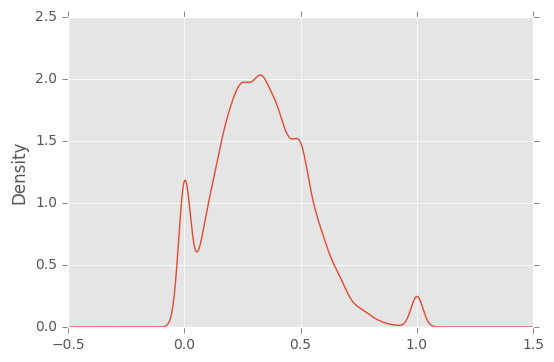

In [12]:
df_join['Rate'].plot(kind='kde', x='Time',y='Rate');

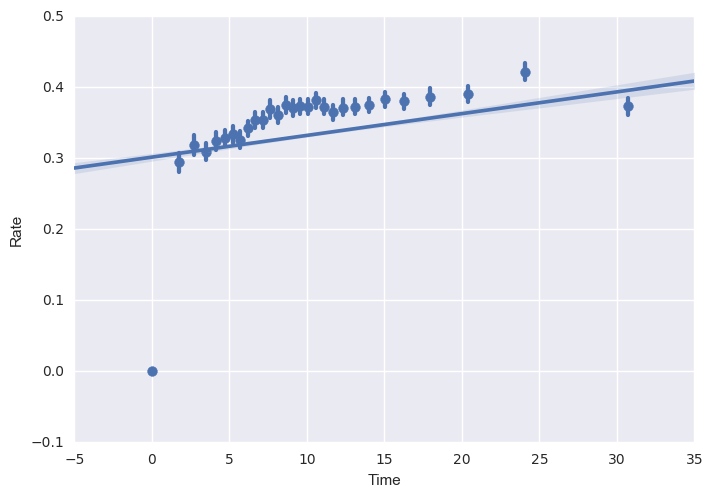

In [13]:
import seaborn as sns; sns.set(color_codes=True)

ax = sns.regplot(x="Time", y="Rate", data=df_join, x_bins=30)


In [14]:
from sklearn.preprocessing import Imputer
#filling in missing values w/ mean and scaling
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
df_join[['Rate','Time']] = imp.fit_transform(df_join[['Rate','Time']])
#imputed_data = imp.transform(df_var)


In [15]:
from sklearn.preprocessing import scale
#scaling, regulating data for mean to equal zero and STD to equal 1
#scaled_data = scale(df_join[['Rate','Time','Touch']])
df_join[['Rate','Time']] = scale(df_join[['Rate','Time']])

In [ ]:
import seaborn as sns
hm = sns.heatmap(data=df_join, annot=True, fmt="d")

KeyboardInterrupt: 

In [16]:
df_join.head()

,Rate,Time,size_1030x590,size_300x250,size_300x265,size_320x50,site_MKBHD,site_curbed,site_eater,site_network,...,site_voxcreative,device_Android Phone,device_Android Tablet,device_BlackBerry,device_Kindle,device_Windows Phone,device_Windows Tablet,device_iPad,device_iPhone,device_iPod
0,-0.022485,-0.014918,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.072683,0.070410,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1.634037,0.009080,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.323671,0.049967,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1.784630,0.039301,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
#testing mean & std to see if I scaled correctly. Although mean does not equal zero, it becomes very very close.
df_join[['Rate','Time']].mean()

Rate    1.963722e-16
Time   -2.236241e-15
dtype: float64

In [18]:
#testing mean & std to see if I scaled correctly. Although mean does not equal zero, it becomes very very close.
df_join[['Rate','Time']].std()

Rate    1.000017
Time    1.000017
dtype: float64

In [19]:
from sklearn.cross_validation import train_test_split
from sklearn import datasets
from sklearn import svm

X = df_join.drop('Rate',axis=1)
y = df_join[['Rate']]
# cross-validation to split the DataFrame into a train set with 80 rows and a test set with 20 rows
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [20]:
X_train.shape, y_train.shape

((23104, 25), (23104, 1))

In [21]:
X_test.shape, y_test.shape

((5777, 25), (5777, 1))

In [22]:
# Fit:
from sklearn import linear_model, metrics
## Train the model using the training sets
lm = linear_model.LinearRegression().fit(X_train, y_train)
#metrics.mean_squared_error(y_test, lm.predict(X_test))

In [23]:
lm = linear_model.LinearRegression().fit(X_train, y_train)
print "~~~ OLS ~~~"
print 'OLS MSE: ', metrics.mean_squared_error(y_test, lm.predict(X_test))

lm_lasso = linear_model.Lasso(alpha = .001).fit(X_train, y_train)
print "~~~ Lasso ~~~"
print 'Lasso MSE: ', metrics.mean_squared_error(y_test, lm_lasso.predict(X_test))


#shrinks coefficients oropotion to correlation
lm_ridge = linear_model.Ridge(alpha = .001).fit(X_train, y_train)
print "~~~ Ridge ~~~"
print 'Ridge MSE: ', metrics.mean_squared_error(y_test, lm_ridge.predict(X_test))


~~~ OLS ~~~
OLS MSE:  0.889611488952
~~~ Lasso ~~~
Lasso MSE:  0.8904063688
~~~ Ridge ~~~
Ridge MSE:  0.889647404657


NOTE TO SELF: 
GridSearchCV  be used to find the optimal parameters to train my final model. Typically, you should run GridSearchCV then look at the parameters that gave the model with the best score. You should then take these parameters and train your final model on all of the data. It is important to note that if you have trained your final model on all of your data, you cannot test it. For any correct test, you must must reserve some of the data.

In [24]:
#gridsearch cv to test out parameters
from sklearn.grid_search import GridSearchCV

parameters = {
    'fit_intercept':[True,False], 
    'normalize':[True,False], 
    'copy_X':[True, False],}
grid = GridSearchCV(lm,parameters, cv=50, scoring='r2')
grid.fit(X_train, y_train)
print "r2 / variance : ", grid.best_score_
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  0.149841419013
Residual sum of squares: 0.89


In [25]:
#gridsearch cv to test out parameters
from sklearn.grid_search import GridSearchCV

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lm,parameters, cv=5, scoring='r2')
grid.fit(X_train, y_train)
print "r2 / variance : ", grid.best_score_
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  0.150266807776
Residual sum of squares: 0.89


In [29]:
#gridsearch cv to test out Lasso
from sklearn.grid_search import GridSearchCV

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_lass = GridSearchCV(lm_lasso,parameters, cv=15)
grid_lass.fit(X_train, y_train)
print "r2 / variance : ", grid_lass.best_score_

r2 / variance :  0.150087417049


In [30]:
from sklearn.grid_search import GridSearchCV

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_ridge = GridSearchCV(lm_ridge,parameters, cv=15)
grid_ridge.fit(X_train, y_train)
print "r2 / variance : ", grid_ridge.best_score_
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  0.150304236097
Residual sum of squares: 0.89


In [496]:
grid.best_score_?

Try Random Forest Regressor as a way to customize parameter setting. 

In [31]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=150, min_samples_split=10 ,min_samples_leaf=100).fit(X_train, y_train)

importance = clf.feature_importances_

# importance_std = np.std(importance)
# for tree in clf.estimators_, axis=0



/Users/karentran/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


In [32]:
importances_df = pd.DataFrame()
importances_df['Features'] = X_train.columns
importances_df['Importances'] = importance

In [33]:
import seaborn as sns

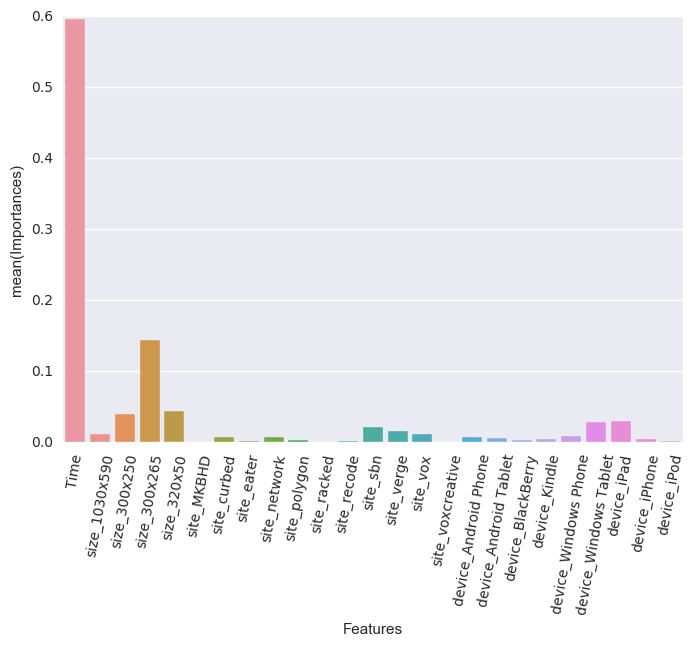

In [34]:
plot = sns.barplot(importances_df['Features'],importances_df['Importances'])

for label in plot.get_xticklabels():
    label.set_rotation(80)


In [36]:
clf_new = RandomForestRegressor()
param_grid = { 
    'n_estimators': [80,90,100],
    'max_depth': [2,3,4,5]}
clf_rfc = GridSearchCV(estimator=clf_new, param_grid=param_grid, cv= 5, scoring='mean_squared_error')
clf_rfc.fit(X_train, y_train)
print "MSE : ", clf_rfc.best_score_
print(clf_rfc.best_params_)
print(clf_rfc.cv)

/Users/karentran/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/karentran/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/karentran/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/karentran/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector 

MSE :  -0.662204140268
{'n_estimators': 90, 'max_depth': 5}
5


In [56]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, clf_rfc.predict(X_test)))

0.83695312956632228

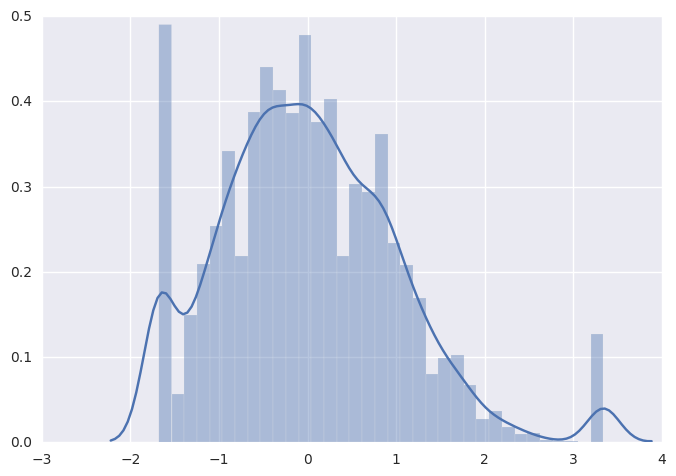

In [54]:
sns.distplot(y_test)

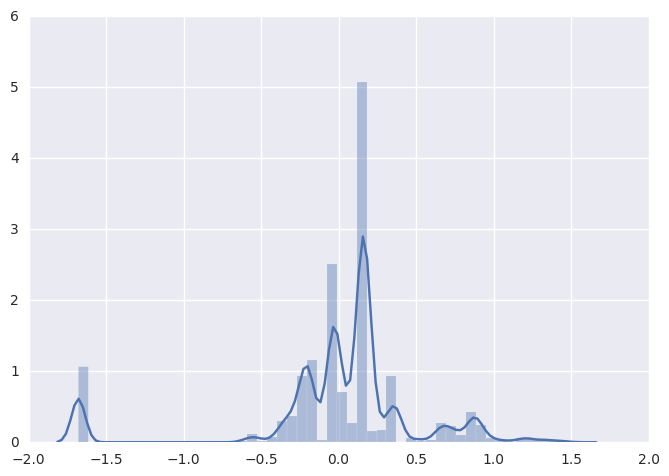

In [55]:
sns.distplot(clf_rfc.predict(X_test))

In [57]:
#sns.regplot(x=clf_rfc.predict(X_test), y=y_test);

In [60]:
ids = df_join['Rate']
predictions = clf_rfc.predict(df_join.drop('Rate', axis=1))
output = pd.DataFrame({ 'Rate' : ids, 'Time': predictions })
output.head()

,Rate,Time
0,-0.022485,0.166954
1,-0.072683,0.166954
2,1.634037,0.915168
3,-0.323671,0.166954
4,1.784630,0.915168
